# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss #df

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape) #returns a tuple (row, col) repr dimension of the df
gss.head() #returns the first five rows of the df

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df): #param: df
    df.realinc.replace([0], np.nan, inplace=True)#first = selected value, second = replacement value, inplace-makes a new copy of df when false???                   
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [13]:
gss.columns

Index(['year', 'id_', 'agewed', 'divorce', 'sibs', 'childs', 'age', 'educ',
       'paeduc', 'maeduc',
       ...
       'memchurh', 'realinc', 'cohort', 'marcohrt', 'ballot', 'wtssall',
       'adults', 'compuse', 'databank', 'wtssnr'],
      dtype='object', length=101)

In [14]:
gss["divorce"] #returns a series

0        0
1        2
2        2
3        2
4        2
5        0
6        0
7        0
8        0
9        2
10       2
11       2
12       2
13       0
14       2
15       1
16       2
17       1
18       2
19       0
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
62436    2
62437    2
62438    1
62439    2
62440    0
62441    2
62442    0
62443    0
62444    1
62445    0
62446    1
62447    0
62448    2
62449    2
62450    2
62451    2
62452    2
62453    1
62454    0
62455    0
62456    2
62457    2
62458    0
62459    1
62460    2
62461    2
62462    1
62463    2
62464    2
62465    1
Name: divorce, Length: 62466, dtype: int64

In [15]:
gss["divorce"].replace([0], np.nan, inplace=True)
gss["divorce"].replace([8], np.nan, inplace=True)
gss["divorce"].replace([9], np.nan, inplace=True)

In [16]:
gss.divorce.value_counts()

2.0    30910
1.0     7988
Name: divorce, dtype: int64

In [17]:
gss["divorce"].describe() #1st, 2nd, 3rd Quartile are all represented by the value 2

count    38898.000000
mean         1.794642
std          0.403968
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: divorce, dtype: float64

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

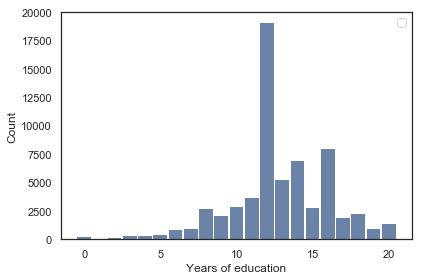

In [18]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count') #similar to Config

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

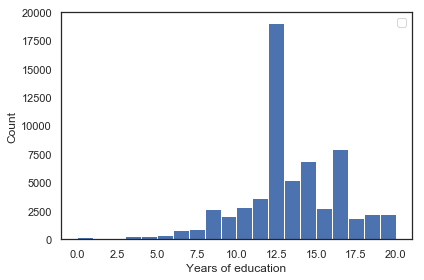

In [19]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna(), bins=20)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

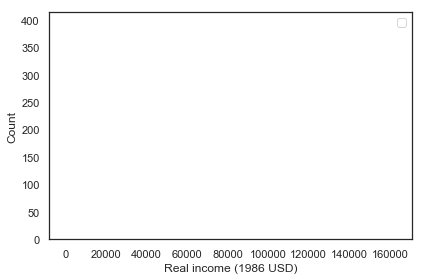

In [25]:
hist_realinc = Hist(gss.realinc)
# print(hist_realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

In [26]:
import thinkstats2

age = gss["age"]
ageHist = thinkstats2.Hist(age)

educ = gss["educ"]
educPmf = thinkstats2.Pmf(educ)

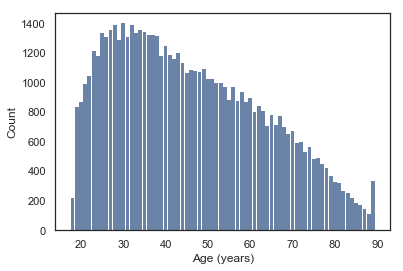

In [27]:
#plotting histogram of age
import thinkplot
thinkplot.Hist(ageHist)
thinkplot.Config(xlabel = "Age (years)", ylabel="Count")

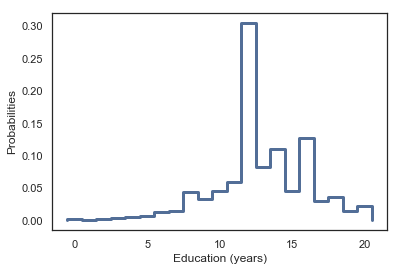

In [28]:
#plotting pmf of educ
thinkplot.Pmf(educPmf)
thinkplot.Config(xlabel="Education (years)", ylabel="Probabilities")

In [29]:
#educ Prob
educPmf[12] #~30% of people have 12 years of education

0.3051114107750594

In [30]:
educPmf[14] #~11% of people have 14 years of education

0.10991780645989853

In [31]:
educPmf[16] #~13% of people have 16 years of education

0.12722339947344763

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

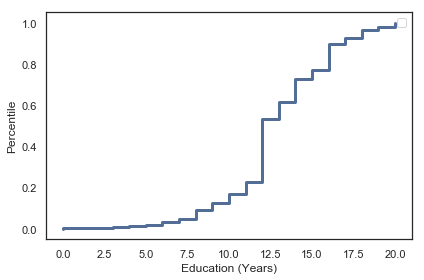

In [32]:
educCdf = thinkstats2.Cdf(educ)
thinkplot.Cdf(educCdf)
decorate(xlabel = "Education (Years)", ylabel = "Percentile") #Q: What does the long straight line represent?

In [33]:
#fraction of people with more than 12 years of education
1-educCdf.Prob(12)

0.46729917164322865

In [34]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

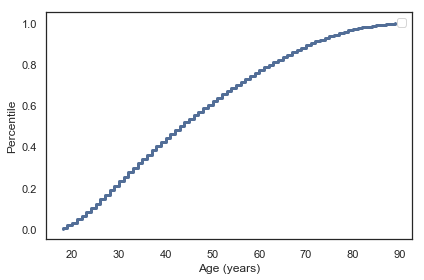

In [35]:
ageCdf = thinkstats2.Cdf(age)
thinkplot.Cdf(ageCdf)
decorate(xlabel = "Age (years)", ylabel = "Percentile")

In [36]:
#median age
ageCdf.Value(0.5)

44.0

In [37]:
#IQR of age
ageCdf.Value(0.75) - ageCdf.Value(0.25)
#equivalently
# ageCdf.Percentile(75) - ageCdf.Percentile(25)

28.0

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

In [38]:
ageWed = gss["agewed"]
ageWed# Solution goes here

0         0
1        21
2        20
3        24
4        22
5         0
6        22
7         0
8         0
9        19
10       25
11       17
12       21
13       18
14       16
15       24
16       18
17       16
18       20
19        0
20       26
21       18
22       19
23       20
24       30
25       18
26       18
27       17
28       19
29       16
         ..
62436     0
62437     0
62438     0
62439     0
62440     0
62441     0
62442     0
62443     0
62444     0
62445     0
62446     0
62447     0
62448     0
62449     0
62450     0
62451     0
62452     0
62453     0
62454     0
62455     0
62456     0
62457     0
62458     0
62459     0
62460     0
62461     0
62462     0
62463     0
62464     0
62465     0
Name: agewed, Length: 62466, dtype: int64

In [39]:
ageWed.value_counts()

0     35717
21     3324
19     2886
18     2767
20     2719
22     2291
23     1980
24     1633
25     1477
17     1453
26      978
27      867
16      843
28      603
30      454
29      452
15      272
32      238
31      230
99      187
33      160
35      135
34      119
14      106
36       72
38       62
40       62
37       58
39       56
13       38
42       35
45       23
43       22
98       19
41       18
44       12
52        9
46        9
49        8
50        8
55        8
47        7
48        7
54        6
58        5
12        4
60        4
56        4
53        3
51        3
63        2
73        2
57        2
68        1
70        1
62        1
61        1
65        1
59        1
90        1
Name: agewed, dtype: int64

In [40]:
ageWed.replace([0, 99, 98], np.nan, inplace=True)
ageWed.value_counts()

21.0    3324
19.0    2886
18.0    2767
20.0    2719
22.0    2291
23.0    1980
24.0    1633
25.0    1477
17.0    1453
26.0     978
27.0     867
16.0     843
28.0     603
30.0     454
29.0     452
15.0     272
32.0     238
31.0     230
33.0     160
35.0     135
34.0     119
14.0     106
36.0      72
38.0      62
40.0      62
37.0      58
39.0      56
13.0      38
42.0      35
45.0      23
43.0      22
41.0      18
44.0      12
52.0       9
46.0       9
50.0       8
55.0       8
49.0       8
48.0       7
47.0       7
54.0       6
58.0       5
56.0       4
12.0       4
60.0       4
53.0       3
51.0       3
63.0       2
57.0       2
73.0       2
68.0       1
90.0       1
70.0       1
65.0       1
59.0       1
62.0       1
61.0       1
Name: agewed, dtype: int64

In [41]:
ageWedHist = thinkstats2.Hist(ageWed)
ageWedPmf = thinkstats2.Pmf(ageWed)
ageWedCdf = thinkstats2.Cdf(ageWed)

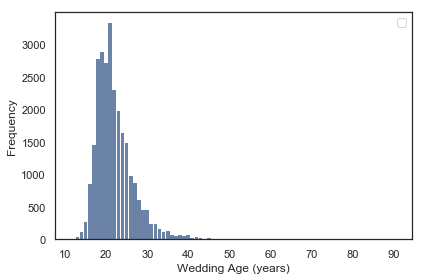

In [42]:
thinkplot.Hist(ageWedHist)
decorate(xlabel="Wedding Age (years)", ylabel="Frequency")

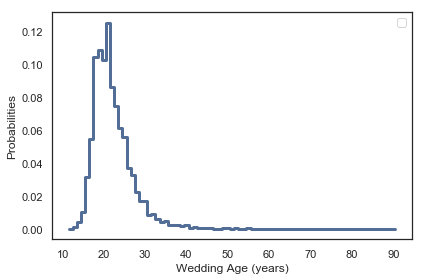

In [43]:
thinkplot.Pmf(ageWedPmf)
decorate(xlabel="Wedding Age (years)", ylabel="Probabilities")

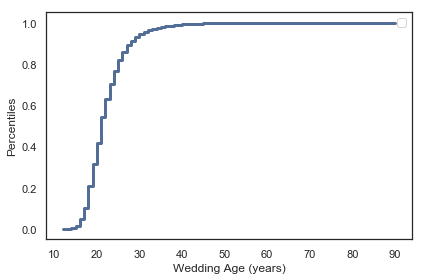

In [44]:
thinkplot.Cdf(ageWedCdf)
decorate(xlabel="Wedding Age (years)", ylabel="Percentiles")

In [45]:
#What is the probability of people who married at the age 20
ageWedPmf[20]

0.10243755415740496

In [46]:
#what is the percentage of people who married at or younger than 20
ageWedCdf.Prob(20)

0.4177372565271446

In [49]:
#What is the median age of marriage
ageWedCdf.Value(0.5)

21.0

In [50]:
ageWed.std()

4.885114143319338

In [51]:
ageWed.describe()

count    26543.000000
mean        22.150058
std          4.885114
min         12.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         90.000000
Name: agewed, dtype: float64

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [52]:
#male and female income
maledf = gss[gss["sex"]==1]
femaledf = gss[gss["sex"]==2]
maleInc = maledf["realinc"]
femaleInc = femaledf["realinc"]

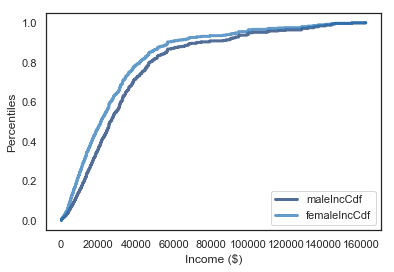

In [53]:
maleIncCdf = thinkstats2.Cdf(maleInc)
femaleIncCdf = thinkstats2.Cdf(femaleInc)
thinkplot.Cdf(maleIncCdf, label="maleIncCdf")
thinkplot.Cdf(femaleIncCdf, label="femaleIncCdf")
thinkplot.Config(xlabel = "Income ($)", ylabel = "Percentiles")

In [54]:
#difference in median
femaleIncCdf.Value(0.5)-maleIncCdf.Value(0.5) 

-5185.0

In [55]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [56]:
politics = gss["partyid"] #series
politics.replace([8,9], np.nan, inplace=True)

In [57]:
# income based on different political affiliation
strongDem = gss[politics==0]["realinc"]
modDem = gss[politics==1]["realinc"]
indDem = gss[politics==2]["realinc"]
ind = gss[politics==3]["realinc"]
indRep = gss[politics==4]["realinc"]  
modRep = gss[politics==5]["realinc"]
strongRep = gss[politics==6]["realinc"]
others = gss[politics==7]["realinc"]

In [58]:
strongDemCdf = thinkstats2.Cdf(strongDem, label = "strongDem")
# modDemCdf = thinkstats2.Cdf(modDem)
# indDemCdf = thinkstats2.Cdf(indDem)
indCdf = thinkstats2.Cdf(ind, label = "ind")
# indRepCdf = thinkstats2.Cdf(indRep)
# modRepCdf = thinkstats2.Cdf(modRep)
strongRepCdf = thinkstats2.Cdf(strongRep, label="strongRep")
othersCdf = thinkstats2.Cdf(others, label="others")

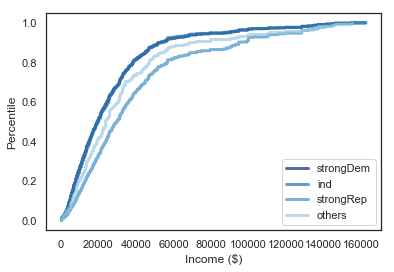

In [59]:
thinkplot.Cdfs([strongDemCdf, indCdf, strongRepCdf, othersCdf])
thinkplot.Config(xlabel="Income ($)", ylabel = "Percentile")

In [60]:
#mean difference
print("mean diffence between strong Dems and strong Reps:", strongDem.mean() - strongRep.mean())
print("median difference between strong Dems and strong Reps:", strongDemCdf.Value(0.5)-strongRepCdf.Value(0.5))
print("spread of the strong Dems data set:", strongDem.std())
print("spread of the strong Reps data set:", strongRep.std())
print("spread of the ind data set:", ind.std())
print("spread of the others data set:", others.std())

mean diffence between strong Dems and strong Reps: -12917.21927105347
median difference between strong Dems and strong Reps: -10301.5
spread of the strong Dems data set: 26802.3168479581
spread of the strong Reps data set: 34666.03177750909
spread of the ind data set: 26465.103417192375
spread of the others data set: 31781.553924205433


## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [61]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [62]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [63]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 17 ms, sys: 22.5 ms, total: 39.5 ms
Wall time: 38 ms


(62466, 101)

In [ ]:
#not sure what this means!